In [102]:
import requests
import json
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [22]:
url = "https://bittrex.com/Api/v2.0/pub/market/GetTicks?marketName=BTC-XVG&tickInterval=hour"

In [37]:
r = requests.get(url)

In [76]:
type(r.json()['result'])

list

In [79]:
# coin = pd.DataFrame.from_dict({ v['O'] for v in (r.json()['result'])},orient='index').reset_index()
coin = pd.DataFrame(r.json()['result'])

In [100]:
# coin['T'] = dt.datetime.utcfromtimestamp(coin['T'])
coin.head()

,C,T,V
0,7.700000e-07,2017-11-20 01:00:00,1.004778e+07
1,7.700000e-07,2017-11-20 02:00:00,8.014260e+06
2,7.600000e-07,2017-11-20 03:00:00,1.405107e+07
3,7.600000e-07,2017-11-20 04:00:00,1.776091e+07
4,7.600000e-07,2017-11-20 05:00:00,1.561669e+07


In [96]:
coin['T']=pd.to_datetime(coin['T'])

In [99]:
coin.drop(['O','L','H','BV'],inplace=True,axis=1)

In [103]:
coin.set_index('T')

In [117]:
start = dt.datetime(2017,12,1)
end = dt.datetime(2018,1,19)
om = coin[coin['T']>start].copy()

In [118]:
om.head()
om.drop(['SMA9','SMA21'],inplace=True,axis=1)

In [119]:
om['SMA9'] = om['C'].rolling(9).mean()
om['SMA21'] = om['C'].rolling(21).mean()

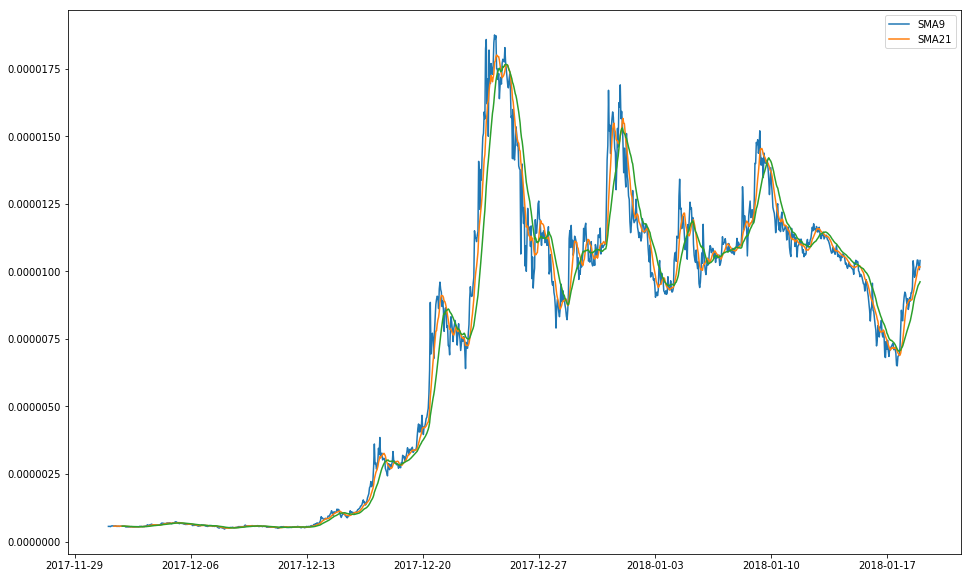

In [123]:
plt.figure(figsize=(16,10))
plt.plot(om['T'],om['C'])
plt.plot(om['T'],om['SMA9'])
plt.plot(om['T'],om['SMA21'])
plt.legend(['SMA9','SMA21'])
plt.show()

In [137]:
om.drop(['PREV_C'],inplace=True,axis=1)

In [135]:
# om['BUY'] = np.where((om['SMA9'][-1] > om['SMA21'][-1]) & (om['SMA9'][-2] < om['SMA21'][-2]),om['C'],0)

In [150]:
om.head()

,C,T,V,SMA9,SMA21
264,5.600000e-07,2017-12-01 01:00:00,3.364757e+06,NaN,NaN
265,5.600000e-07,2017-12-01 02:00:00,8.142881e+06,NaN,NaN
266,5.600000e-07,2017-12-01 03:00:00,4.610612e+06,NaN,NaN
267,5.500000e-07,2017-12-01 04:00:00,6.475530e+06,NaN,NaN
268,5.700000e-07,2017-12-01 05:00:00,1.392259e+07,NaN,NaN


In [147]:
om.drop(['BUY'],axis=1,inplace=True)

In [164]:
om['BUY'] = np.where((om['SMA9'] > om['SMA21']) & (om['SMA9'].shift(1) < om['SMA21'].shift(1)),om['C'],0)

In [165]:
om['SELL'] = np.where((om['SMA9'] < om['SMA21']) & (om['SMA9'].shift(1) > om['SMA21'].shift(1)),om['C'],0)

In [168]:
bs = om[(om['BUY'] > 0) | (om['SELL'] > 0)]
bs.head(100)

,C,T,V,SMA9,SMA21,BUY,SELL
308,5.500000e-07,2017-12-02 21:00:00,2.323532e+07,5.444444e-07,5.442857e-07,5.500000e-07,0.000000e+00
338,6.100000e-07,2017-12-04 03:00:00,1.841180e+07,6.066667e-07,6.071429e-07,0.000000e+00,6.100000e-07
341,6.800000e-07,2017-12-04 06:00:00,1.851199e+08,6.222222e-07,6.176190e-07,6.800000e-07,0.000000e+00
370,6.700000e-07,2017-12-05 11:00:00,2.464940e+07,6.866667e-07,6.871429e-07,0.000000e+00,6.700000e-07
404,6.000000e-07,2017-12-06 21:00:00,1.788613e+07,6.000000e-07,5.985714e-07,6.000000e-07,0.000000e+00
408,5.600000e-07,2017-12-07 01:00:00,1.931711e+07,5.877778e-07,5.904762e-07,0.000000e+00,5.600000e-07
442,5.200000e-07,2017-12-08 11:00:00,2.003458e+07,5.077778e-07,5.052381e-07,5.200000e-07,0.000000e+00
480,5.900000e-07,2017-12-10 01:00:00,1.182663e+07,5.755556e-07,5.761905e-07,0.000000e+00,5.900000e-07
518,5.500000e-07,2017-12-11 15:00:00,1.194420e+07,5.311111e-07,5.266667e-07,5.500000e-07,0.000000e+00
528,5.200000e-07,2017-12-12 01:00:00,5.168975e+06,5.266667e-07,5.266667e-07,0.000000e+00,5.200000e-07


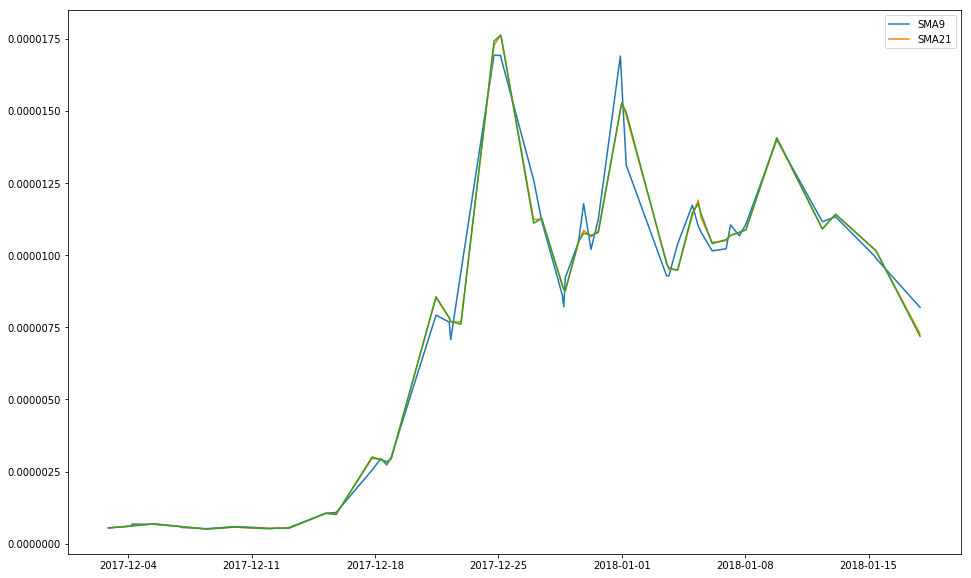

In [169]:
plt.figure(figsize=(16,10))
plt.plot(bs['T'],bs['C'])
plt.plot(bs['T'],bs['SMA9'])
plt.plot(bs['T'],bs['SMA21'])
plt.legend(['SMA9','SMA21'])
plt.show()

In [179]:
dollars = 1000
stocks = 0
print('Started with $ :' + str(dollars))
for i,r in bs.iterrows():
    
    if r['SELL'] == 0:
        stocks = dollars/r['BUY']
        print('Bought stocks on ' + str(r['T']) +' # ' + str(stocks))
    else:
        dollars = stocks*r['SELL']
        print('Made $ on ' + str(r['T']) +' worth of : ' + str(dollars))
    

print('Final stocks : #' + str(stocks))
print('Made $ worth of :' + str(dollars))

Started with $ :1000
Bought stocks on 2017-12-02 21:00:00 # 1818181818.181818
Made $ on 2017-12-04 03:00:00 worth of : 1109.090909090909
Bought stocks on 2017-12-04 06:00:00 # 1631016042.7807486
Made $ on 2017-12-05 11:00:00 worth of : 1092.7807486631016
Bought stocks on 2017-12-06 21:00:00 # 1821301247.771836
Made $ on 2017-12-07 01:00:00 worth of : 1019.9286987522282
Bought stocks on 2017-12-08 11:00:00 # 1961401343.754285
Made $ on 2017-12-10 01:00:00 worth of : 1157.2267928150281
Bought stocks on 2017-12-11 15:00:00 # 2104048714.209142
Made $ on 2017-12-12 01:00:00 worth of : 1094.1053313887537
Bought stocks on 2017-12-12 08:00:00 # 2026120984.0532475
Made $ on 2017-12-12 19:00:00 worth of : 1094.1053313887537
Bought stocks on 2017-12-13 03:00:00 # 1953759520.33706
Made $ on 2017-12-15 05:00:00 worth of : 2051.447496353913
Bought stocks on 2017-12-15 19:00:00 # 1899488422.5499191
Made $ on 2017-12-17 20:00:00 worth of : 4843.695477502294
Bought stocks on 2017-12-18 08:00:00 # 16419